In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pl
import scipy.stats as ss

In [2]:
adv = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-allaberganov/Statistics/Lesson_2/conversion.csv') 
adv

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [17]:
adv.xyz_campaign_id.nunique()

3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.

In [36]:
adv_1 = adv.groupby('fb_campaign_id', as_index = False) \
    .agg({'Impressions': 'sum'})

In [37]:
adv_1['Impressions'] = np.log(adv_1['Impressions'])
adv_1

,fb_campaign_id,Impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473
...,...,...
686,179977,13.937527
687,179978,13.365386
688,179979,11.928546
689,179981,13.580108


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


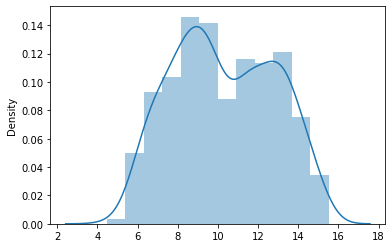

In [38]:
sns.distplot(x = adv_1.Impressions)

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов. Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [41]:
adv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [43]:
adv['CTR'] = adv['Clicks']/adv['Impressions']

In [48]:
adv.sort_values('CTR', ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


In [51]:
adv_916 = adv.query("xyz_campaign_id == '916'").sort_values('CTR', ascending=False)
adv_916

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
14,709059,916,103968,30-34,M,20,14669,7,10.28,1,1,0.000477
34,710360,916,104185,45-49,M,21,2182,1,1.53,1,1,0.000458
33,710088,916,104140,45-49,M,24,2283,1,1.47,1,0,0.000438
16,709115,916,103978,30-34,M,30,2305,1,0.57,1,0,0.000434
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,0.000425
46,710961,916,104285,35-39,F,25,2508,1,1.22,1,0,0.000399
52,711877,916,104438,45-49,F,63,17572,7,9.38,1,0,0.000398
45,710880,916,104272,30-34,F,65,13019,5,6.96,1,0,0.000384
48,711217,916,104328,35-39,F,20,2783,1,1.60,1,0,0.000359
50,711764,916,104419,45-49,F,10,11199,4,5.73,1,1,0.000357


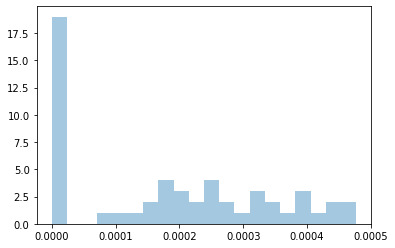

In [54]:
sns.distplot(x = adv_916.CTR, kde = False, bins = 20)

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов. Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna()

In [3]:
adv['CPC'] = adv['Spent']/adv['Clicks']

In [4]:
adv

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.910000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,1.471926


In [5]:
ss.iqr(adv['CPC'] ,nan_policy='omit')

0.25436369905

In [6]:
adv['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [7]:
(adv['CPC'].dropna()).describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


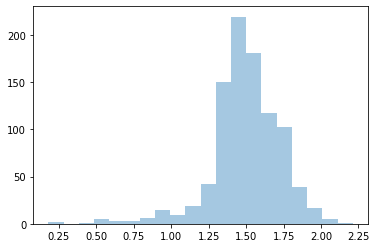

In [8]:
sns.distplot(x = adv['CPC'].dropna(), kde = False, bins = 20)

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

In [9]:
adv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1.29


In [12]:
M = adv.query("gender == 'M'")

In [13]:
F = adv.query("gender == 'F'")

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


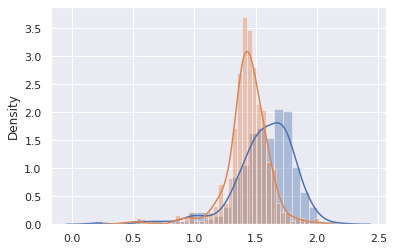

In [22]:
sns.set_theme()
sns.distplot(x = M['CPC'].dropna())
sns.distplot(x = F['CPC'].dropna())

In [33]:
id_1121814 = adv.query("ad_id == '1121814'")
id_1121814['Approved_Conversion']/id_1121814['Clicks']

860    0.030879
dtype: float64

In [35]:
round(0.030879 * 100, 2)

3.09